<a href="https://colab.research.google.com/github/Veleces/Project/blob/main/Machine%20Learning%20Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Stock Price Prediction Model 
Herramienta diseñada para pronosticar el comportamiento de un intrumento bursátil (Stock,ETF) para los próximos N días.

Nota: Los resultados de este modelo no son consejo de inversión.

# Instalación de librerías 
Instalamos las librerías necesarias para ejecutar este modelo (10 minutos aproximadamente)

In [ ]:

install.packages("quantmod")
install.packages("lubridate")
install.packages("dplyr")
install.packages("tidyr")
install.packages("ggplot2")
install.packages("caret")
install.packages("lattice")
install.packages('TTR')
install.packages("randomForest")
install.packages("magrittr")
install.packages("parallel")
install.packages("doParallel")
install.packages("ranger")


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘xts’, ‘zoo’, ‘TTR’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘stringr’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘shape’, ‘future.apply’, ‘numDeriv’, ‘progressr’, ‘SQUAREM’, ‘diagram’, ‘lava’, ‘prodlim’, ‘proxy’, ‘iterators’, ‘Rcpp’, ‘clock’, ‘gower’, ‘hardhat’, ‘ipred’, ‘timeDate’, ‘e1071’, ‘foreach’, ‘ModelMetrics’, ‘plyr’, ‘pROC’, ‘recipes’, ‘reshape2’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecifi

In [ ]:
# Llamamos a las librerías para poder utilizarlas 

library(quantmod)
library(lubridate)
library(dplyr)
library(tidyr)
library(ggplot2)
library(caret)
library(lattice)
library(TTR)
library(randomForest)
library(magrittr)
library(parallel)
library(doParallel)
library(ranger)


Loading required package: xts

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric


Loading required package: TTR

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 


Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union



######################### Warning from 'xts' package ##########################
#                                                                             #
# The dplyr lag() function breaks how base R's lag() function is supposed to  #
# work, which breaks lag(my_xts). Calls to lag(my_xts) that you type or       #
# source() into this session won't work correctly.                            #
#                                                                             #
# Use stats::lag() to make sure you're not using dplyr::lag(), or you can add #
# conf

In [ ]:
# Creamos las variables globales que nos permitirán personalizar nuestro modelo

# Ticker de nuestra acción (nombre con el que cotiza en bolsa)

ticker <- "NVDA" 

# Fecha inicial con la cual empezaremos a recabar nuestros datos, la fecha inicial 
# será "1900-01-01" para no poner la fecha inicial específica

first_date <- as.Date("1900-01-01")

# Fecha hasta la cual recabaremos nuestros datos

today <- as.Date("2023-04-30")

# Rango de días que queremos pronosticar 

prediction_days <- 10

# Porcentaje de datos que vamos a entrenar

Percentage <- 0.85


# Recolección de datos 
Recabaremos nuestros datos del instrumento a pronosticar 

In [ ]:
# Recolectamos nuestros datos históricos del ticker 

stock <- getSymbols(ticker, src = "yahoo", from = first_date,
                    to = today, periodicity = "daily", auto.assign = FALSE)

# Utilizamos el na.omit para omitir los NA al recolectar nuestros datos

stock <- na.omit(stock)

# Comprobamos que no tengas ningún valor NA

sum(is.na(stock))


[1] 0

In [ ]:
# Mostranos los datos recolectados
head(stock)
tail(stock)

           NVDA.Open NVDA.High NVDA.Low NVDA.Close NVDA.Volume NVDA.Adjusted
1999-01-22  0.437500  0.488281 0.388021   0.410156   271468800     0.3763577
1999-01-25  0.442708  0.458333 0.410156   0.453125    51048000     0.4157859
1999-01-26  0.458333  0.467448 0.411458   0.417969    34320000     0.3835268
1999-01-27  0.419271  0.429688 0.395833   0.416667    24436800     0.3823321
1999-01-28  0.416667  0.419271 0.412760   0.415365    22752000     0.3811374
1999-01-29  0.415365  0.416667 0.395833   0.395833    24403200     0.3632149

           NVDA.Open NVDA.High NVDA.Low NVDA.Close NVDA.Volume NVDA.Adjusted
2023-04-21    269.52    271.83   267.22     271.19    34510300        271.19
2023-04-24    270.13    273.66   266.71     270.42    33928200        270.42
2023-04-25    270.78    272.47   262.25     262.41    37852700        262.41
2023-04-26    270.02    273.30   267.05     269.56    40633700        269.56
2023-04-27    273.63    274.95   266.25     272.26    37716100        272.26
2023-04-28    272.25    277.58   270.71     277.49    29168700        277.49

# Visualización de Datos

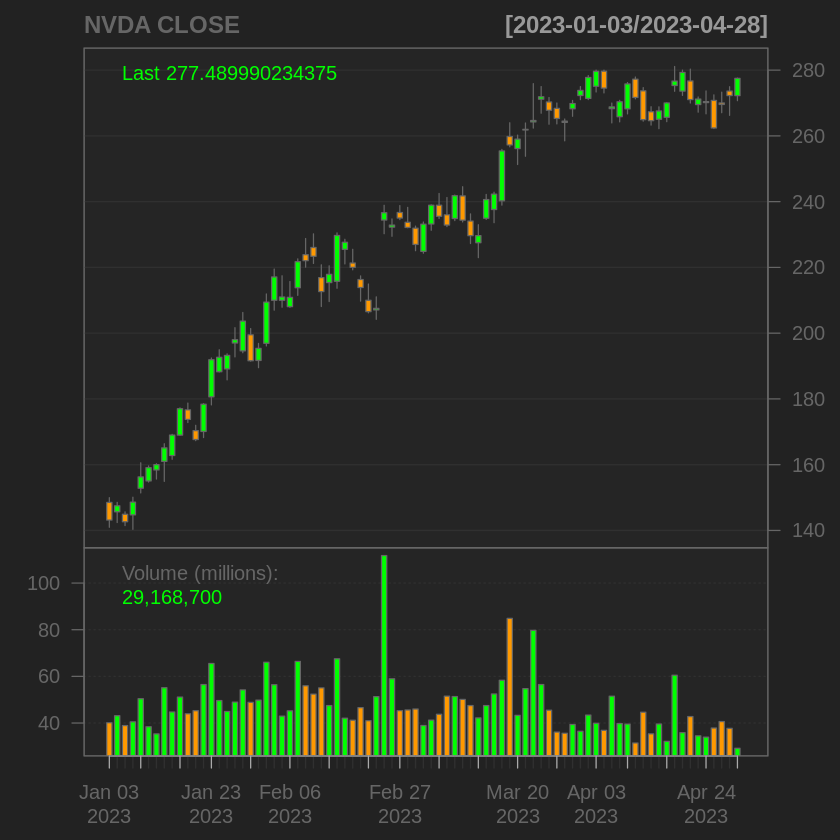

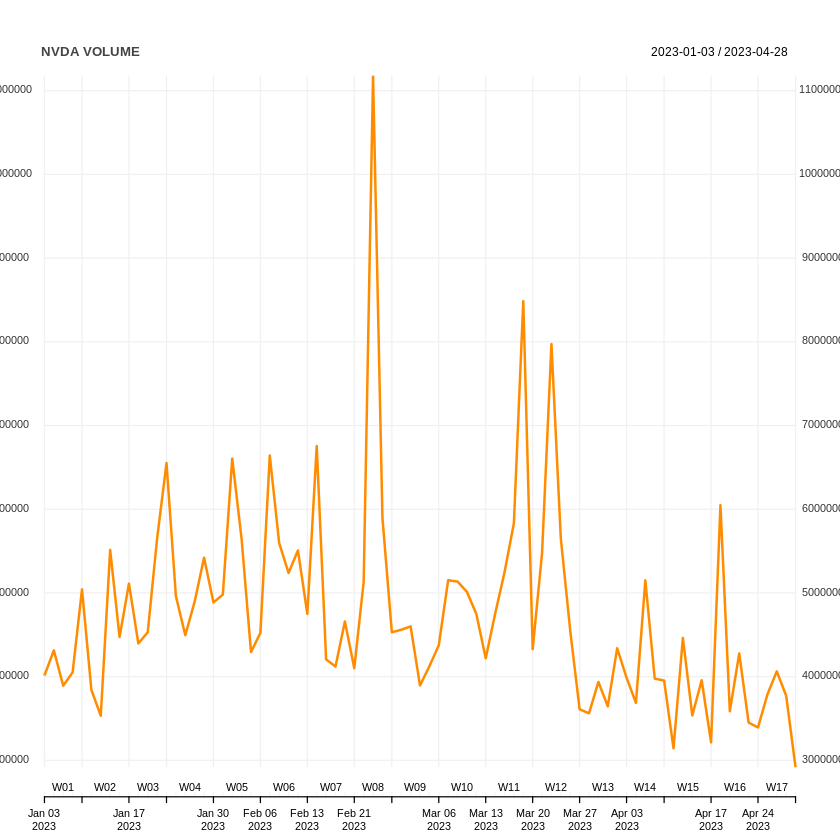

In [ ]:
# Gráficamos nuestros datos (Open, High, Low, Volume y Close)

dates <- paste0("2023-01-01::", today)

stock_chart <- chartSeries(stock, 
                           name = paste0(ticker, " CLOSE"), 
                           theme = "black", 
                           subset = dates)

vol_chart <- chart_Series(stock[ , 5],
                          name =paste0(ticker, " VOLUME"),
                          subset = dates)
vol_chart

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“"subset" is not a graphical parameter”


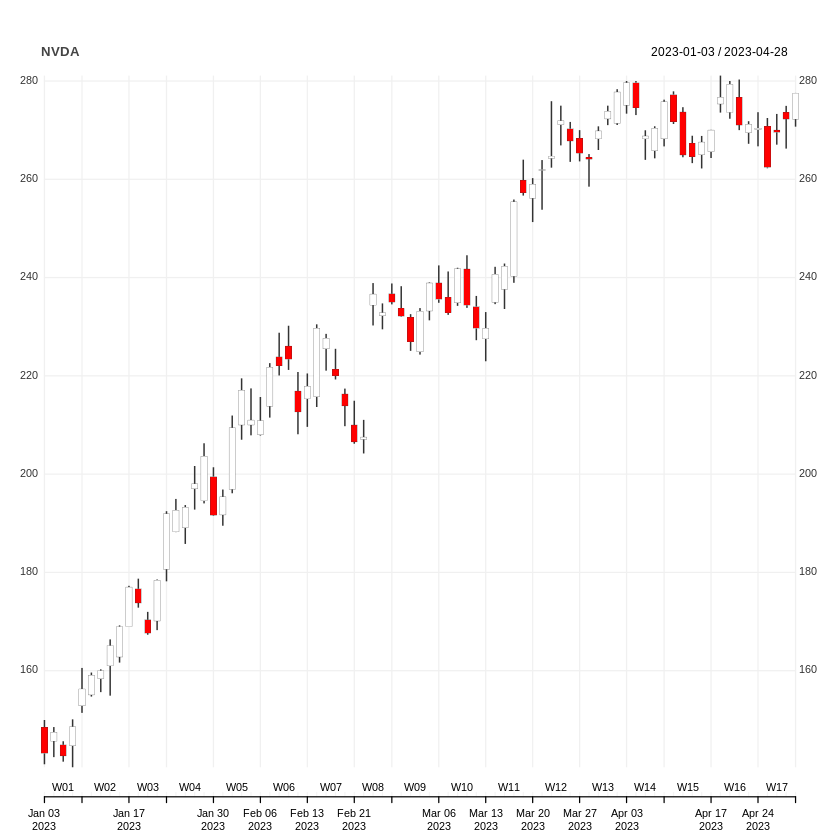

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“"subset" is not a graphical parameter”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“"subset" is not a graphical parameter”


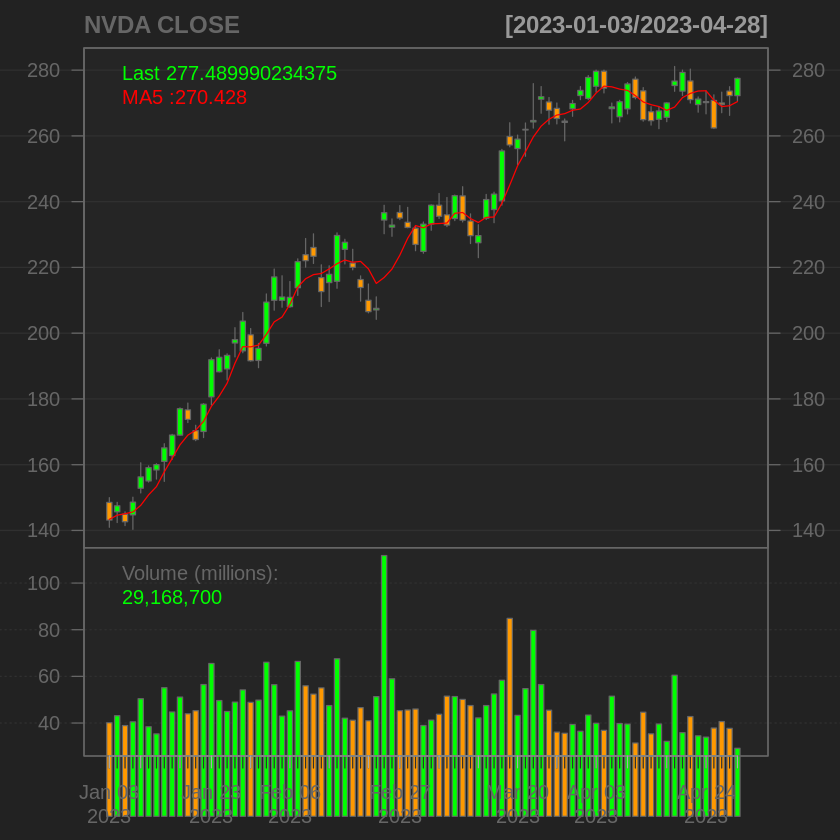

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“"subset" is not a graphical parameter”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“"subset" is not a graphical parameter”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“"subset" is not a graphical parameter”


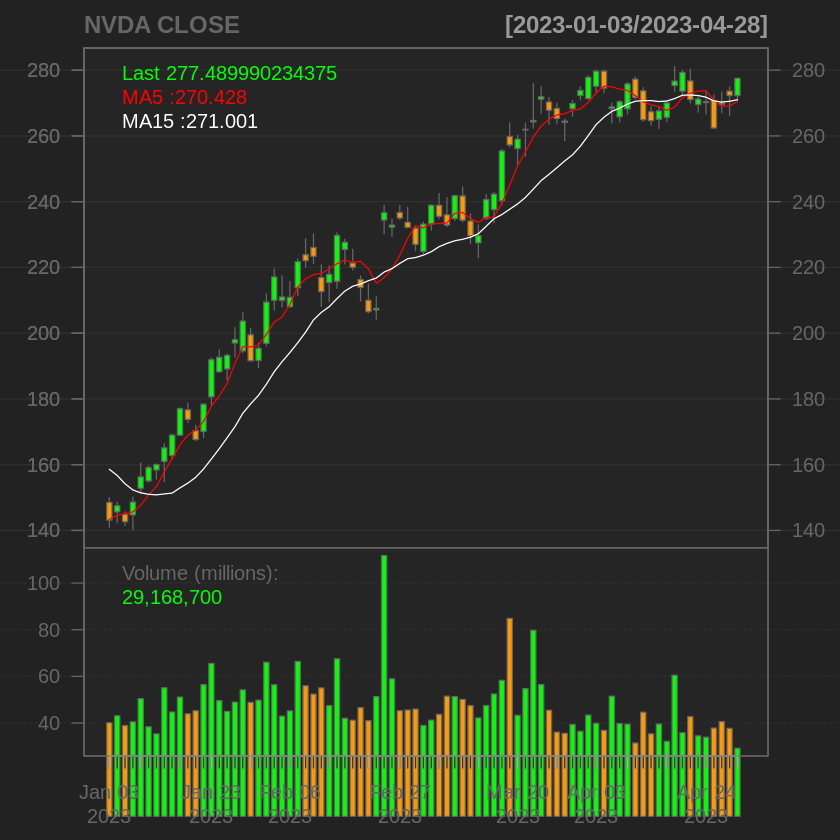

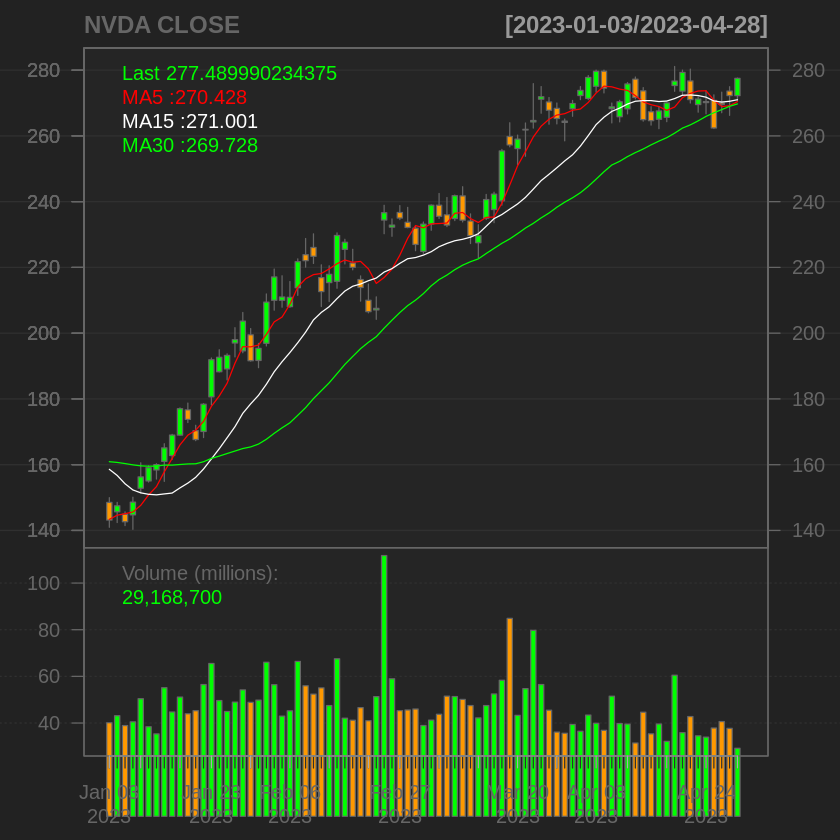

In [ ]:
# Gráficamos las medias móviles de 5, 15 y 30 días

# Calculamos las medias móviles

MA5 <- na.omit(SMA(Cl(stock), n = 5))
MA15 <- na.omit(SMA(Cl(stock), n = 15))
MA30 <- na.omit(SMA(Cl(stock), n = 30))

# Creamos nuestros gráficos

chart_Series(stock, name = ticker, TA = NULL, subset = dates)

addTA(MA5, on = 1, col = "red", subset = dates)
addTA(MA15, on = 1, col = "white", subset = dates)
addTA(MA30, on = 1, col = "green", subset = dates)

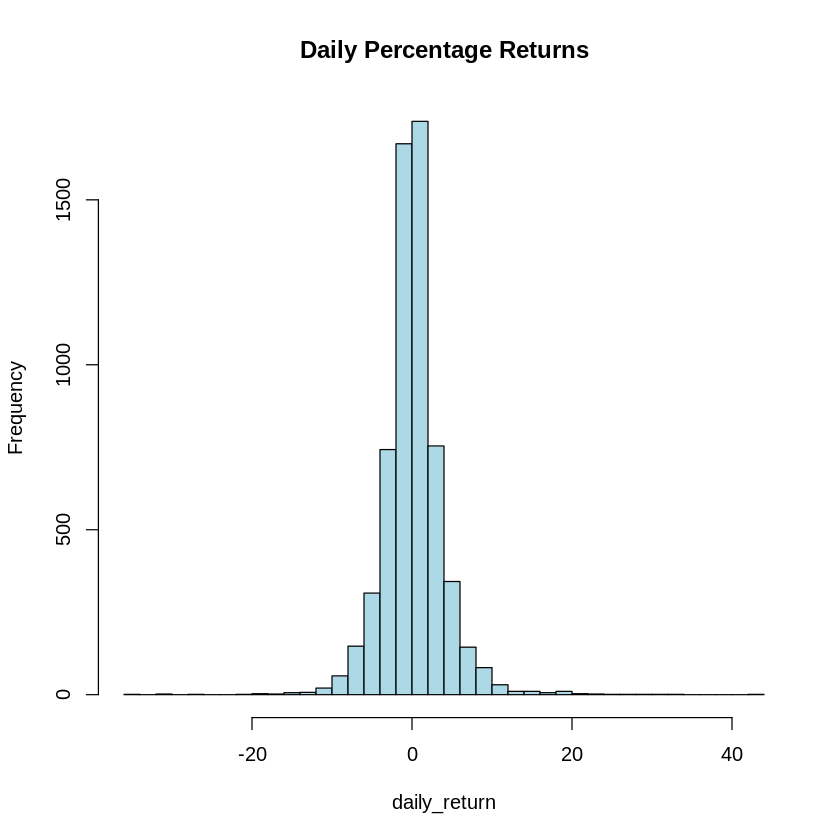

In [ ]:
# Gráficamos la distribución de los retornos porcentuales diarios

daily_return <- Delt(stock[ , 6], type = "arithmetic") * 100

hist(daily_return, breaks = 30, col = "lightblue", main = "Daily Percentage Returns")


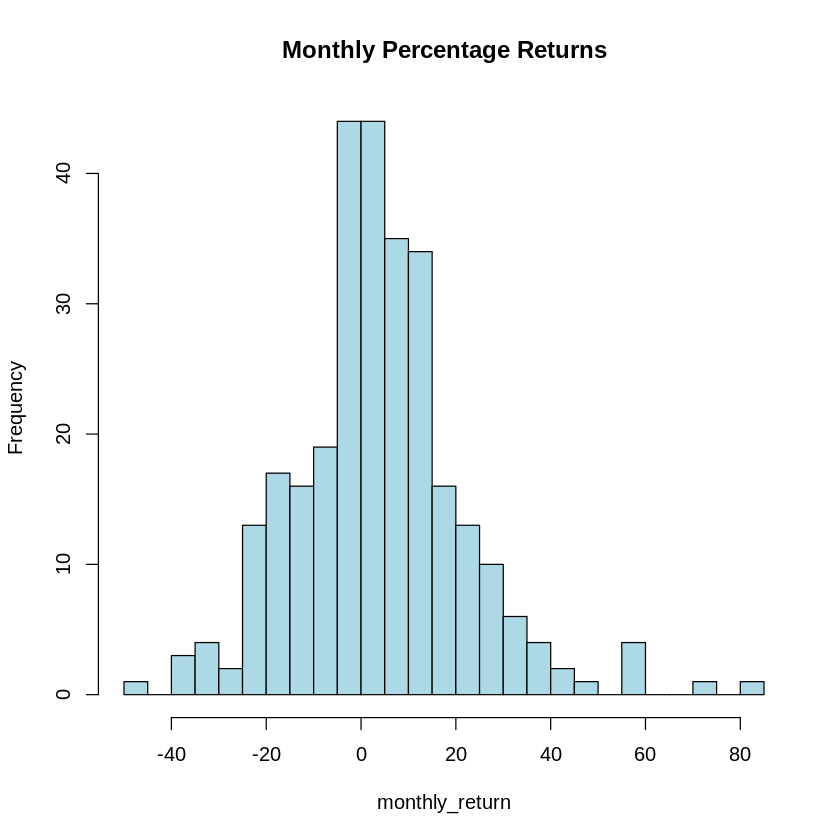

In [ ]:
# Gráficamos la distribución de los retornos porcentuales mensuales

monthly_stock <- getSymbols(ticker, src = "yahoo", from = first_date,
                            to = today, periodicity = "monthly", 
                            auto.assign = FALSE)

monthly_return <- Delt(monthly_stock[ , 6], type = "arithmetic") * 100

hist(monthly_return, breaks = 30, col = "lightblue", main = "Monthly Percentage Returns")


# Ingeniería / selección de características más limpieza de datos
Vamos a omitir la columna Close ya que viene siendo la misma que adjusted close.

In [ ]:
# Convertimos los datos de stock formato xts a Data Frame de dos columnas
# Utilizamos el na.omit para omitir los na al recolectar nuestros datos

stock_open <- as.data.frame(stock[ , 1])
stock_high <- as.data.frame(stock[ , 2])
stock_low <- as.data.frame(stock[ , 3]) 
stock_volume <- as.data.frame(stock[ , 5])
stock_adj_close <- as.data.frame(stock[ , 6])

# Se muestra el ejemplo de un Data Frame
head(stock_adj_close)

,NVDA.Adjusted
,<dbl>
1999-01-22,0.3763577
1999-01-25,0.4157859
1999-01-26,0.3835268
1999-01-27,0.3823321
1999-01-28,0.3811374
1999-01-29,0.3632149


In [ ]:
# Pasamos las fechas que están como fila a columnas 

stock_open$Date <- rownames(stock_open)
stock_high$Date <- rownames(stock_high)
stock_low$Date <- rownames(stock_low)
stock_volume$Date <- rownames(stock_volume)
stock_adj_close$Date <- rownames(stock_adj_close)

# Se muestra un ejemplo
head(stock_adj_close)
tail(stock_adj_close)

,NVDA.Adjusted,Date
,<dbl>,<chr>
1999-01-22,0.3763577,1999-01-22
1999-01-25,0.4157859,1999-01-25
1999-01-26,0.3835268,1999-01-26
1999-01-27,0.3823321,1999-01-27
1999-01-28,0.3811374,1999-01-28
1999-01-29,0.3632149,1999-01-29


,NVDA.Adjusted,Date
,<dbl>,<chr>
2023-04-21,271.19,2023-04-21
2023-04-24,270.42,2023-04-24
2023-04-25,262.41,2023-04-25
2023-04-26,269.56,2023-04-26
2023-04-27,272.26,2023-04-27
2023-04-28,277.49,2023-04-28


In [ ]:
# Eliminamos las filas de fechas

rownames(stock_open) <- NULL
rownames(stock_high) <- NULL
rownames(stock_low) <- NULL
rownames(stock_volume) <- NULL
rownames(stock_adj_close) <- NULL

# Asignamos nombres a nuestras dos columnas

names(stock_open) <- c("Open", "Date")
names(stock_high) <- c("High", "Date")
names(stock_low) <- c("Low", "Date")
names(stock_volume) <- c("Volume", "Date")
names(stock_adj_close) <- c("Adjusted_close", "Date")

# Las columnas Date se encuentran en formato Character, debemos
# convertilas a Formato Date

stock_open$Date <- as.Date(stock_open$Date)
stock_high$Date <- as.Date(stock_high$Date)
stock_low$Date <- as.Date(stock_low$Date)
stock_volume$Date <- as.Date(stock_volume$Date)
stock_adj_close$Date <- as.Date(stock_adj_close$Date)

# Visualizamos el resultado

head(stock_adj_close)
tail(stock_adj_close)


,Adjusted_close,Date
,<dbl>,<date>
1,0.3763577,1999-01-22
2,0.4157859,1999-01-25
3,0.3835268,1999-01-26
4,0.3823321,1999-01-27
5,0.3811374,1999-01-28
6,0.3632149,1999-01-29


,Adjusted_close,Date
,<dbl>,<date>
6102,271.19,2023-04-21
6103,270.42,2023-04-24
6104,262.41,2023-04-25
6105,269.56,2023-04-26
6106,272.26,2023-04-27
6107,277.49,2023-04-28


Creamos un rango de fechas, estos días son los que vamos a pronosticar. En este caso queremos pronosticar n días, estos días tendrán valor númerico NA y vamos a omitir los días sábados y domingos en nuestro rango de fechas.

In [ ]:
# Variabales globales para el rango de fechas (Contando que el pronóstico
# se hace todos los sábados)

start_date <- today 
end_date <- today + prediction_days

# date_range_open

date_range_open <- seq(start_date, end_date, by = "day")
date_range_open <- subset(date_range_open, 
                          !(weekdays(date_range_open) %in% c("Saturday",
                                                               "Sunday")))
Open <- as.numeric(NA)
date_range_open <- as.data.frame(cbind(Open, date_range_open))

date_range_open$Date <- as.Date(date_range_open$date_range_open)
date_range_open$date_range_open <- NULL 

# date_range_high

date_range_high <- seq(start_date, end_date, by = "day")
date_range_high <- subset(date_range_high, 
                          !(weekdays(date_range_high) %in% c("Saturday",
                                                             "Sunday")))
High <- as.numeric(NA)
date_range_high <- as.data.frame(cbind(High, date_range_high))

date_range_high$Date <- as.Date(date_range_high$date_range_high)
date_range_high$date_range_high <- NULL 

# date_range_low

date_range_low <- seq(start_date, end_date, by = "day")
date_range_low <- subset(date_range_low, 
                          !(weekdays(date_range_low) %in% c("Saturday",
                                                             "Sunday")))
Low <- as.numeric(NA)
date_range_low <- as.data.frame(cbind(Low, date_range_low))

date_range_low$Date <- as.Date(date_range_low$date_range_low)
date_range_low$date_range_low <- NULL 

# date_range_vol

date_range_vol <- seq(start_date, end_date, by = "day")
date_range_vol <- subset(date_range_vol, 
                         !(weekdays(date_range_vol) %in% c("Saturday",
                                                           "Sunday")))
Volume <- as.numeric(NA)
date_range_vol <- as.data.frame(cbind(Volume, date_range_vol))

date_range_vol$Date <- as.Date(date_range_vol$date_range_vol)
date_range_vol$date_range_vol <- NULL 

# date_range_adjcl

date_range_adjcl <- seq(from = start_date, to = end_date, by = "day")
date_range_adjcl <- subset(date_range_adjcl, 
                         !(weekdays(date_range_adjcl) %in% c("Saturday",
                                                           "Sunday")))
Adjusted_close <- as.numeric(NA)
date_range_adjcl <- as.data.frame(cbind(Adjusted_close, date_range_adjcl))

date_range_adjcl$Date <- as.Date(date_range_adjcl$date_range_adjcl)
date_range_adjcl$date_range_adjcl <- NULL 


In [ ]:
# Contamos los días totales del rango de fecha de 30 días, excluyendo 
# sábados y domingos y lo almacenamos en la variable days_range

days_range <- as.numeric(length(date_range_adjcl[ , 1]))

cat(days_range, "days")


8 days

In [ ]:
# Unimos nuestros rango de fechas al Data Frame que le corresponde, ejemplo:
# Unir date_range_open con stock_open

stock_open <- rbind(stock_open, date_range_open)
stock_high <- rbind(stock_high, date_range_high)
stock_low <- rbind(stock_low, date_range_low)
stock_volume <- rbind(stock_volume, date_range_vol)
stock_adj_close <- rbind(stock_adj_close, date_range_adjcl)

# Visualizamos un resultado de los Data Frames juntos

tail(stock_adj_close, days_range + 1)

,Adjusted_close,Date
,<dbl>,<date>
6107,277.49,2023-04-28
6108,NA,2023-05-01
6109,NA,2023-05-02
6110,NA,2023-05-03
6111,NA,2023-05-04
6112,NA,2023-05-05
6113,NA,2023-05-08
6114,NA,2023-05-09
6115,NA,2023-05-10


# Selección de características

In [ ]:
# Duplicanos la columna fecha, para no perderla ya que vamos a dividir
# esta columna en tres: Year, Month y Day. Y posteriormente nos 
# servirá para gráficar nuestros resultados 

stock_open$Dup_Date = stock_open$Date
stock_high$Dup_Date = stock_high$Date
stock_low$Dup_Date = stock_low$Date
stock_volume$Dup_Date = stock_volume$Date
stock_adj_close$Dup_Date = stock_adj_close$Date

stock_open <- stock_open %>% separate(Date, c("Year", "Month", "Day"))
stock_high <- stock_high %>% separate(Date, c("Year", "Month", "Day"))
stock_low <- stock_low %>% separate(Date, c("Year", "Month", "Day"))
stock_volume <- stock_volume %>% separate(Date, c("Year", "Month", "Day"))
stock_adj_close <- stock_adj_close %>% separate(Date, c("Year", "Month", "Day"))

# Resultado 
tail(stock_adj_close, days_range + 1)

,Adjusted_close,Year,Month,Day,Dup_Date
,<dbl>,<chr>,<chr>,<chr>,<date>
6107,277.49,2023,04,28,2023-04-28
6108,NA,2023,05,01,2023-05-01
6109,NA,2023,05,02,2023-05-02
6110,NA,2023,05,03,2023-05-03
6111,NA,2023,05,04,2023-05-04
6112,NA,2023,05,05,2023-05-05
6113,NA,2023,05,08,2023-05-08
6114,NA,2023,05,09,2023-05-09
6115,NA,2023,05,10,2023-05-10


In [ ]:
# Convertimos las tres columnas Year, Month y Day en formato númerico

stock_open$Year = as.numeric(stock_open$Year)
stock_high$Year = as.numeric(stock_high$Year)
stock_low$Year = as.numeric(stock_low$Year)
stock_volume$Year = as.numeric(stock_volume$Year)
stock_adj_close$Year = as.numeric(stock_adj_close$Year)

stock_open$Month = as.numeric(stock_open$Month)
stock_high$Month = as.numeric(stock_high$Month)
stock_low$Month = as.numeric(stock_low$Month)
stock_volume$Month = as.numeric(stock_volume$Month)
stock_adj_close$Month = as.numeric(stock_adj_close$Month)

stock_open$Day = as.numeric(stock_open$Day)
stock_high$Day = as.numeric(stock_high$Day)
stock_low$Day = as.numeric(stock_low$Day)
stock_volume$Day = as.numeric(stock_volume$Day)
stock_adj_close$Day = as.numeric(stock_adj_close$Day)


In [ ]:
head(stock_adj_close)
tail(stock_adj_close, days_range + 1)

,Adjusted_close,Year,Month,Day,Dup_Date
,<dbl>,<dbl>,<dbl>,<dbl>,<date>
1,0.3763577,1999,1,22,1999-01-22
2,0.4157859,1999,1,25,1999-01-25
3,0.3835268,1999,1,26,1999-01-26
4,0.3823321,1999,1,27,1999-01-27
5,0.3811374,1999,1,28,1999-01-28
6,0.3632149,1999,1,29,1999-01-29


,Adjusted_close,Year,Month,Day,Dup_Date
,<dbl>,<dbl>,<dbl>,<dbl>,<date>
6107,277.49,2023,4,28,2023-04-28
6108,NA,2023,5,1,2023-05-01
6109,NA,2023,5,2,2023-05-02
6110,NA,2023,5,3,2023-05-03
6111,NA,2023,5,4,2023-05-04
6112,NA,2023,5,5,2023-05-05
6113,NA,2023,5,8,2023-05-08
6114,NA,2023,5,9,2023-05-09
6115,NA,2023,5,10,2023-05-10


# Modelo de Machine Learning Random Forest
Justificación

Elegí el modelo de Random Forest porque no es necesario escalar los datos como en un modelo de Deep Learning, además es un método de ensamble que combina múltiples árboles de decisión para reducir la varianza, esto me puede ser útil en el caso de la predicción del precio de una acción, donde los datos pueden ser ruidosos, además con este modelo me puede servir para saber que características son más importantes para predecir el precio de la acción, que en cambio con un modelo de Red Neuronal no se sabe con exaxtitud como es que este toma sus decisiones y principalmente porque el tiempo de entrenamiento es más corto, por si lo quiero adaptar junto a un modelo de Trading Algortimico.

Métrica de Evaluación RMSE

La Raíz del Error Cuadrático Medio (RMSE) nos ayuda a medir qué tan bien se desempeña nuestro nuestro modelo de Random Forest. Compara los precios que el modelo predice contra los precios reales y calcula cuánto fue la desviación en promedio. Si el RMSE es bajo, significa que el modelo está haciendo un buen trabajo al predecir los precios de las acciones.

In [ ]:
# Actualizamos nuestra variable today para crear nuestro datos de entrenamiento
# y los de validación

today <- as.Date(date_range_adjcl[2][,1][1])
today


[1] "2023-05-01"

In [ ]:
# Creamos los datos de entrenamiento y validación por cada Data Frame
# Esto con la finalidad de relizar predicciones individuales de nuestras 
# caracterpisticas y después unirlas para predecir Adjusted Close

# Open

set.seed(1900)

open_train_data = createDataPartition(na.omit(subset(
  stock_open, stock_open$Dup_Date < today))$Open,
  p = Percentage, list = FALSE)

open_test = rbind(stock_open[-open_train_data, ], 
                  subset(stock_open, stock_open$Dup_Date >= today))

# High

set.seed(1900)

high_train_data = createDataPartition(na.omit(subset(
  stock_high, stock_high$Dup_Date < today))$High,
  p = Percentage, list = FALSE)

high_test = rbind(stock_high[-high_train_data, ], 
                  subset(stock_high, stock_high$Dup_Date >= today))

# Low

set.seed(1900)

low_train_data = createDataPartition(na.omit(subset(
  stock_low, stock_low$Dup_Date < today))$Low,
  p = Percentage, list = FALSE)

low_test = rbind(stock_low[-low_train_data, ], 
                  subset(stock_low, stock_low$Dup_Date >= today))

# Volume

set.seed(1900)

vol_train_data = createDataPartition(na.omit(subset(
  stock_volume, stock_volume$Dup_Date < today))$Volume,
  p = Percentage, list = FALSE)

vol_test = rbind(stock_volume[-vol_train_data, ], 
                  subset(stock_volume, stock_volume$Dup_Date >= today))


In [ ]:
# Eliminamos las N filas adicionales equivalentes a days_range que nos agregó test

open_test <- open_test[1 : (nrow(open_test) - days_range), ]
high_test <- high_test[1 : (nrow(high_test) - days_range), ]
low_test <- low_test[1 : (nrow(low_test) - days_range), ] 
vol_test <- vol_test[1 : (nrow(vol_test) - days_range), ]


In [ ]:
# Datos informativos sobre nuestros Data Frames

t <- length(vol_train_data[,1])
ts <- length(vol_test[,1])
sum <- sum(t + ts)
result <- sum - days_range

cat("Filas en nuestro Df ticker:", length(stock[,6]),
"\nFilas de days_range (días a predecir):", days_range,
"\nFilas ticker + filas de predicción:", length(stock[,6])  + days_range,
"\nFilas del train:", t,
"\nFilas del test:", ts,
"\nSuma train y test filas:", sum,
"\nTiker Df con filas de predicción - filas days_range:", result)

Filas en nuestro Df ticker: 6107 
Filas de days_range (días a predecir): 8 
Filas ticker + filas de predicción: 6115 
Filas del train: 5192 
Filas del test: 923 
Suma train y test filas: 6115 
Tiker Df con filas de predicción - filas days_range: 6107

In [ ]:
tail(vol_test, days_range + 1)

,Volume,Year,Month,Day,Dup_Date
,<dbl>,<dbl>,<dbl>,<dbl>,<date>
6107,29168700,2023,4,28,2023-04-28
6108,NA,2023,5,1,2023-05-01
6109,NA,2023,5,2,2023-05-02
6110,NA,2023,5,3,2023-05-03
6111,NA,2023,5,4,2023-05-04
6112,NA,2023,5,5,2023-05-05
6113,NA,2023,5,8,2023-05-08
6114,NA,2023,5,9,2023-05-09
6115,NA,2023,5,10,2023-05-10


# Ajuste de Hiperparámetros con Caret

In [ ]:
cl <- makeCluster(detectCores())
registerDoParallel(cl)

In [ ]:
# Definimos el grid de hiperparámetros

grid <- expand.grid(
  mtry = seq(2, 5, by = 1),
  splitrule = c("variance", "extratrees"),
  min.node.size = seq(1, 5, by = 1)
)

In [ ]:
# Entrenamos el modelo usando la función de Caret para ajustar los hiperparámetros

open_rf_model <- train(
  Open ~ Year + Month + Day,
  data = stock_open[open_train_data, ],
  method = "ranger",
  trControl = trainControl(method = "cv", number = 5),
  tuneGrid = grid
)

high_rf_model <- train(
  High ~ Year + Month + Day,
  data = stock_high[high_train_data, ],
  method = "ranger",
  trControl = trainControl(method = "cv", number = 5),
  tuneGrid = grid
)

low_rf_model <- train(
  Low ~ Year + Month + Day,
  data = stock_low[low_train_data, ],
  method = "ranger",
  trControl = trainControl(method = "cv", number = 5),
  tuneGrid = grid
)

vol_rf_model <- train(
  Volume ~ Year + Month + Day,
  data = stock_volume[vol_train_data, ],
  method = "ranger",
  trControl = trainControl(method = "cv", number = 5),
  tuneGrid = grid
)

# stop cluster
stopCluster(cl)


Warning message in nominalTrainWorkflow(x = x, y = y, wts = weights, info = trainInfo, :
“There were missing values in resampled performance measures.”
Warning message in train.default(x, y, weights = w, ...):
“missing values found in aggregated results”
Warning message in nominalTrainWorkflow(x = x, y = y, wts = weights, info = trainInfo, :
“There were missing values in resampled performance measures.”
Warning message in train.default(x, y, weights = w, ...):
“missing values found in aggregated results”
Warning message in nominalTrainWorkflow(x = x, y = y, wts = weights, info = trainInfo, :
“There were missing values in resampled performance measures.”
Warning message in train.default(x, y, weights = w, ...):
“missing values found in aggregated results”
Warning message in nominalTrainWorkflow(x = x, y = y, wts = weights, info = trainInfo, :
“There were missing values in resampled performance measures.”
Warning message in train.default(x, y, weights = w, ...):
“missing values found in 

In [ ]:
# Hacemos las predicciones

# Open

open_rf_pred <- predict(open_rf_model, open_test)

# calculate RMSE
open_rf_datos <- cbind(open_rf_pred, open_test)
open_rf_rmse <- RMSE(open_rf_datos$Open, open_rf_datos$open_rf_pred,
 na.rm = TRUE)
 
# High

high_rf_pred <- predict(high_rf_model, high_test)

# calculate RMSE
high_rf_datos <- cbind(high_rf_pred, high_test)
high_rf_rmse <- RMSE(high_rf_datos$High, high_rf_datos$high_rf_pred,
 na.rm = TRUE)

# Low

low_rf_pred <- predict(low_rf_model, low_test)

# calculate RMSE
low_rf_datos <- cbind(low_rf_pred, low_test)
low_rf_rmse <- RMSE(low_rf_datos$Low, low_rf_datos$low_rf_pred,
 na.rm = TRUE)

# Volume

vol_rf_pred <- predict(vol_rf_model, vol_test)

# calculate RMSE
vol_rf_datos <- cbind(vol_rf_pred, vol_test)
vol_rf_rmse <- RMSE(vol_rf_datos$Volume, vol_rf_datos$vol_rf_pred,
 na.rm = TRUE)


In [ ]:
tail(open_rf_datos, days_range + 1)

,open_rf_pred,Open,Year,Month,Day,Dup_Date
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<date>
6098,272.5949,265.65,2023,4,17,2023-04-17
6108,260.6023,NA,2023,5,1,2023-05-01
6109,260.6252,NA,2023,5,2,2023-05-02
6110,261.4962,NA,2023,5,3,2023-05-03
6111,262.4119,NA,2023,5,4,2023-05-04
6112,257.3327,NA,2023,5,5,2023-05-05
6113,254.8406,NA,2023,5,8,2023-05-08
6114,254.8823,NA,2023,5,9,2023-05-09
6115,255.1524,NA,2023,5,10,2023-05-10


In [ ]:
# Se muestra el RMSE de cada predicción 

cat("Open Predict RMSE:", open_rf_rmse, "\nHigh Predict RMSE:", high_rf_rmse,
"\nLow Predict RMSE:", low_rf_rmse, "\nVolume Predict RMSE:", vol_rf_rmse)


Open Predict RMSE: 2.190744 
High Predict RMSE: 1.516463 
Low Predict RMSE: 1.819212 
Volume Predict RMSE: 37163564

In [ ]:
# Se muestra los resultados de los modelos anteriores

open_rf_model
high_rf_model
low_rf_model
vol_rf_model


Random Forest 

5192 samples
   3 predictor

No pre-processing
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 4154, 4153, 4155, 4152, 4154 
Resampling results across tuning parameters:

  mtry  splitrule   min.node.size  RMSE      Rsquared   MAE      
  2     variance    1              3.409021  0.9968583  1.1389036
  2     variance    2              3.454413  0.9967671  1.1484827
  2     variance    3              3.511252  0.9966539  1.1702441
  2     variance    4              3.528354  0.9966110  1.1892878
  2     variance    5              3.650789  0.9963902  1.2231051
  2     extratrees  1              3.536782  0.9967943  1.2548490
  2     extratrees  2              3.540679  0.9967765  1.2640389
  2     extratrees  3              3.630895  0.9966345  1.2986314
  2     extratrees  4              3.740333  0.9964285  1.3415568
  2     extratrees  5              3.884738  0.9961489  1.3919557
  3     variance    1              2.730854  0.9979471  0.8728977
  3   

Random Forest 

5193 samples
   3 predictor

No pre-processing
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 4153, 4153, 4155, 4156, 4155 
Resampling results across tuning parameters:

  mtry  splitrule   min.node.size  RMSE      Rsquared   MAE      
  2     variance    1              3.438006  0.9968974  1.0977610
  2     variance    2              3.476850  0.9968296  1.1148302
  2     variance    3              3.544702  0.9967206  1.1344763
  2     variance    4              3.604356  0.9966184  1.1585945
  2     variance    5              3.670594  0.9964850  1.1839893
  2     extratrees  1              3.627057  0.9967510  1.2525625
  2     extratrees  2              3.612561  0.9967595  1.2595151
  2     extratrees  3              3.750608  0.9965165  1.2911946
  2     extratrees  4              3.836543  0.9963860  1.3420485
  2     extratrees  5              4.094127  0.9959099  1.4227982
  3     variance    1              2.695250  0.9980621  0.7946537
  3   

Random Forest 

5193 samples
   3 predictor

No pre-processing
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 4154, 4154, 4153, 4156, 4155 
Resampling results across tuning parameters:

  mtry  splitrule   min.node.size  RMSE      Rsquared   MAE      
  2     variance    1              3.394812  0.9967077  1.1075173
  2     variance    2              3.355826  0.9967810  1.1052254
  2     variance    3              3.477744  0.9965431  1.1341033
  2     variance    4              3.509324  0.9965036  1.1427529
  2     variance    5              3.588791  0.9963183  1.1847480
  2     extratrees  1              3.532918  0.9966365  1.2445397
  2     extratrees  2              3.538085  0.9966268  1.2636851
  2     extratrees  3              3.690116  0.9963619  1.2854323
  2     extratrees  4              3.639505  0.9964507  1.2909619
  2     extratrees  5              3.819371  0.9961357  1.3655045
  3     variance    1              2.572512  0.9980544  0.7916064
  3   

Random Forest 

5192 samples
   3 predictor

No pre-processing
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 4154, 4153, 4153, 4155, 4153 
Resampling results across tuning parameters:

  mtry  splitrule   min.node.size  RMSE      Rsquared   MAE     
  2     variance    1              31457323  0.4700283  18344572
  2     variance    2              31446069  0.4700234  18353882
  2     variance    3              31394614  0.4710592  18341468
  2     variance    4              31321434  0.4728364  18331999
  2     variance    5              31407193  0.4697731  18412787
  2     extratrees  1              30883580  0.4857732  17903169
  2     extratrees  2              30824220  0.4878021  17900715
  2     extratrees  3              30896930  0.4858450  17983943
  2     extratrees  4              30900260  0.4860642  17999655
  2     extratrees  5              30896388  0.4868187  18020312
  3     variance    1              32241307  0.4575317  18711351
  3     variance  

Podemos ver que la variable "Year" tiene gran impacto en el pronóstico de nuestros modelos

In [ ]:
# Unimos los valores pronósticados en el Data Frame stock_x

stock_open$Open[(nrow(stock_open) - (days_range - 1)) : nrow(stock_open)] <-
  open_rf_datos$open_rf_pred[(nrow(open_rf_datos) - (days_range - 1)) : 
  nrow(open_rf_datos)]

stock_high$High[(nrow(stock_high) - (days_range - 1)) : nrow(stock_high)] <-
  high_rf_datos$high_rf_pred[(nrow(high_rf_datos) - (days_range - 1)) : 
  nrow(high_rf_datos)]

stock_low$Low[(nrow(stock_low) - (days_range - 1)) : nrow(stock_low)] <-
  low_rf_datos$low_rf_pred[(nrow(low_rf_datos) - (days_range - 1)) : 
  nrow(low_rf_datos)]

stock_volume$Volume[(nrow(stock_volume) - (days_range - 1)) : nrow(stock_volume)] <-
  vol_rf_datos$vol_rf_pred[(nrow(vol_rf_datos) - (days_range - 1)) : 
  nrow(vol_rf_datos)]

# Agregamos las columnas Open, High, Low y Volume a nuestro Data Frame
# Adjusted Close para realizar su pronóstico 

stock_adj_close$Open <- stock_open$Open
stock_adj_close$High <- stock_high$High
stock_adj_close$Low <- stock_low$Low
stock_adj_close$Volume <- stock_volume$Volume

# Visualizamos el nuestro Data Frame stock_adj_close

tail(stock_adj_close, days_range + 1)


,Adjusted_close,Year,Month,Day,Dup_Date,Open,High,Low,Volume
,<dbl>,<dbl>,<dbl>,<dbl>,<date>,<dbl>,<dbl>,<dbl>,<dbl>
6107,277.49,2023,4,28,2023-04-28,272.2500,277.5800,270.7100,29168700
6108,NA,2023,5,1,2023-05-01,260.6023,266.4125,259.3444,46020750
6109,NA,2023,5,2,2023-05-02,260.6252,266.4610,259.6299,45768939
6110,NA,2023,5,3,2023-05-03,261.4962,266.8033,260.3561,45116640
6111,NA,2023,5,4,2023-05-04,262.4119,266.1508,259.3535,45957504
6112,NA,2023,5,5,2023-05-05,257.3327,261.2332,254.2783,47433650
6113,NA,2023,5,8,2023-05-08,254.8406,261.0553,253.1753,45173310
6114,NA,2023,5,9,2023-05-09,254.8823,261.4278,253.2592,45661991
6115,NA,2023,5,10,2023-05-10,255.1524,262.0910,253.5541,45620552


Creamos nuestro Training y Test Data para el Data Frame stock_adj_close

In [ ]:
# Training y Test data para predecir Adjusted Close

set.seed(1900)

adjcl_train_data = createDataPartition(na.omit(subset(
  stock_adj_close, stock_adj_close$Dup_Date < today))$Adjusted_close,
  p = Percentage, list = FALSE)

adjcl_test = rbind(stock_adj_close[-adjcl_train_data, ], 
                   subset(stock_adj_close, stock_adj_close$Dup_Date >= 
                   today))
                   

In [ ]:
# Eliminamos las N filas adicionales equivalentes a days_range que nos agregó test

adjcl_test <- adjcl_test[1 : (nrow(adjcl_test) - days_range), ]


In [ ]:
# Información sobre nuestros datos

t <- length(adjcl_train_data[,1])
ts <- length(adjcl_test[,1])
sum <- sum(t + ts)
result <- sum - days_range


cat("Filas en nuestro Df ticker:", length(stock[,6]),
"\nFilas de days_range (días a predecir):", days_range,
"\nFilas ticker + filas de predicción:", length(stock[,6])  + days_range,
"\nFilas del train:", t,
"\nFilas del test:", ts,
"\nSuma train y test filas:", sum,
"\nTiker Df con filas de predicción - filas days_range:", result)

Filas en nuestro Df ticker: 6107 
Filas de days_range (días a predecir): 8 
Filas ticker + filas de predicción: 6115 
Filas del train: 5192 
Filas del test: 923 
Suma train y test filas: 6115 
Tiker Df con filas de predicción - filas days_range: 6107

In [ ]:
# Duplicar la fecha y moverla hasta el final, eliminar la actual

adjcl_test$Date <- adjcl_test$Dup_Date
tail(adjcl_test, days_range + 1)


,Adjusted_close,Year,Month,Day,Dup_Date,Open,High,Low,Volume,Date
,<dbl>,<dbl>,<dbl>,<dbl>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<date>
6098,270.02,2023,4,17,2023-04-17,265.6500,270.0600,264.3300,32147100,2023-04-17
6108,NA,2023,5,1,2023-05-01,260.6023,266.4125,259.3444,46020750,2023-05-01
6109,NA,2023,5,2,2023-05-02,260.6252,266.4610,259.6299,45768939,2023-05-02
6110,NA,2023,5,3,2023-05-03,261.4962,266.8033,260.3561,45116640,2023-05-03
6111,NA,2023,5,4,2023-05-04,262.4119,266.1508,259.3535,45957504,2023-05-04
6112,NA,2023,5,5,2023-05-05,257.3327,261.2332,254.2783,47433650,2023-05-05
6113,NA,2023,5,8,2023-05-08,254.8406,261.0553,253.1753,45173310,2023-05-08
6114,NA,2023,5,9,2023-05-09,254.8823,261.4278,253.2592,45661991,2023-05-09
6115,NA,2023,5,10,2023-05-10,255.1524,262.0910,253.5541,45620552,2023-05-10


In [ ]:
# Eliminar la columna Dup_Date

adjcl_test$Dup_Date <- NULL
tail(adjcl_test, days_range + 1)


,Adjusted_close,Year,Month,Day,Open,High,Low,Volume,Date
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<date>
6098,270.02,2023,4,17,265.6500,270.0600,264.3300,32147100,2023-04-17
6108,NA,2023,5,1,260.6023,266.4125,259.3444,46020750,2023-05-01
6109,NA,2023,5,2,260.6252,266.4610,259.6299,45768939,2023-05-02
6110,NA,2023,5,3,261.4962,266.8033,260.3561,45116640,2023-05-03
6111,NA,2023,5,4,262.4119,266.1508,259.3535,45957504,2023-05-04
6112,NA,2023,5,5,257.3327,261.2332,254.2783,47433650,2023-05-05
6113,NA,2023,5,8,254.8406,261.0553,253.1753,45173310,2023-05-08
6114,NA,2023,5,9,254.8823,261.4278,253.2592,45661991,2023-05-09
6115,NA,2023,5,10,255.1524,262.0910,253.5541,45620552,2023-05-10


### Modelo de Random Forest para el Data Frame stock_adj_close


In [ ]:
# Ajuste de hiperparámetros 

cl <- makeCluster(detectCores())
registerDoParallel(cl)

# define grid of hyperparameters
grid <- expand.grid(
  mtry = seq(2, 7, by = 1),
  splitrule = c("variance", "extratrees"),
  min.node.size = seq(1, 5, by = 1)
)

adjcl_rf_model <- train(
  Adjusted_close ~ Year + Month + Day + Open + High + Low + Volume,
  data = stock_adj_close[adjcl_train_data, ],
  method = "ranger",
  trControl = trainControl(method = "cv", number = 5),
  tuneGrid = grid
)

# stop cluster
stopCluster(cl)


In [ ]:
# Adjusted Close

adjcl_rf_pred <- predict(adjcl_rf_model, adjcl_test)

# calculate RMSE
adjcl_rf_datos <- cbind(adjcl_rf_pred, adjcl_test)
adjcl_rf_rmse <- RMSE(adjcl_rf_datos$Adjusted_close, adjcl_rf_datos$adjcl_rf_pred,
 na.rm = TRUE)


In [ ]:
# Se muestra el RMSE del Adjusted Close Prediction

cat("Adjusted Close Predict RMSE:", adjcl_rf_rmse)


Adjusted Close Predict RMSE: 1.500131

In [ ]:
# Resultados del Modelo

adjcl_rf_model


Random Forest 

5192 samples
   7 predictor

No pre-processing
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 4152, 4155, 4155, 4153, 4153 
Resampling results across tuning parameters:

  mtry  splitrule   min.node.size  RMSE      Rsquared   MAE      
  2     variance    1              1.331430  0.9995241  0.4426457
  2     variance    2              1.320339  0.9995308  0.4404873
  2     variance    3              1.333028  0.9995225  0.4429718
  2     variance    4              1.331192  0.9995235  0.4416796
  2     variance    5              1.337217  0.9995203  0.4443875
  2     extratrees  1              1.319043  0.9995364  0.4345470
  2     extratrees  2              1.317424  0.9995353  0.4348670
  2     extratrees  3              1.312161  0.9995411  0.4330427
  2     extratrees  4              1.323138  0.9995343  0.4354010
  2     extratrees  5              1.326145  0.9995323  0.4352015
  3     variance    1              1.264131  0.9995695  0.4166406
  3   

# Visualización de Pronóstico para los próximos N días
Son N días si quitamos los sábado y domingos

In [ ]:
# Convertir stock a formato xts para poder graficar con chartSeries
stock <- as.xts(stock)

op_title <- "OPEN"
hg_title <- "HIGH"
lw_title <- "LOW"
vl_title <- "VOLUME"
adcl_title <- "ADJUSTED CLOSE"


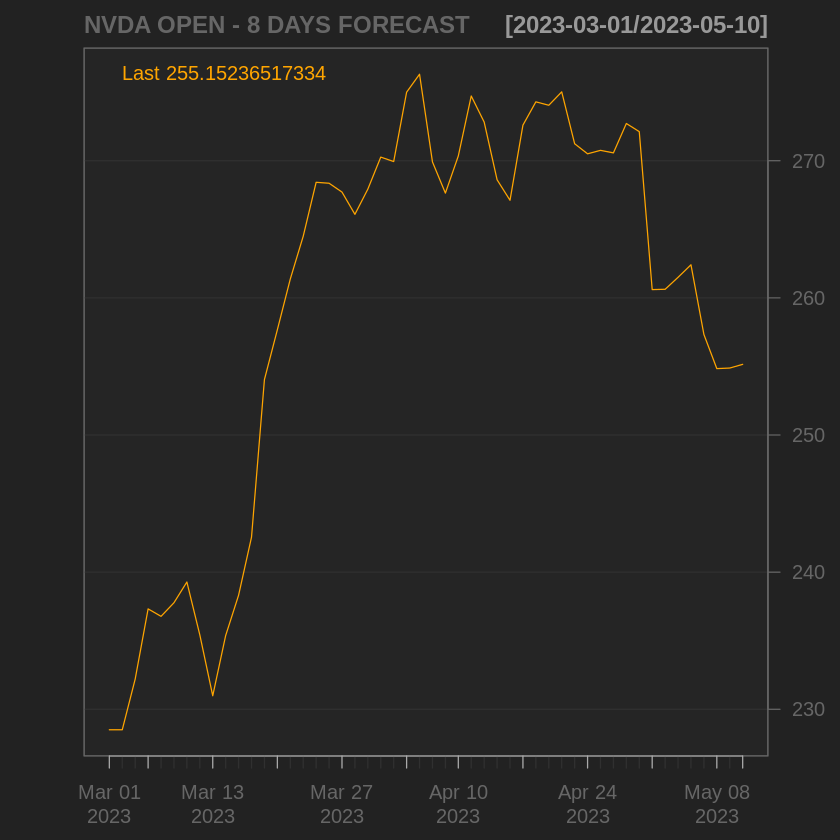

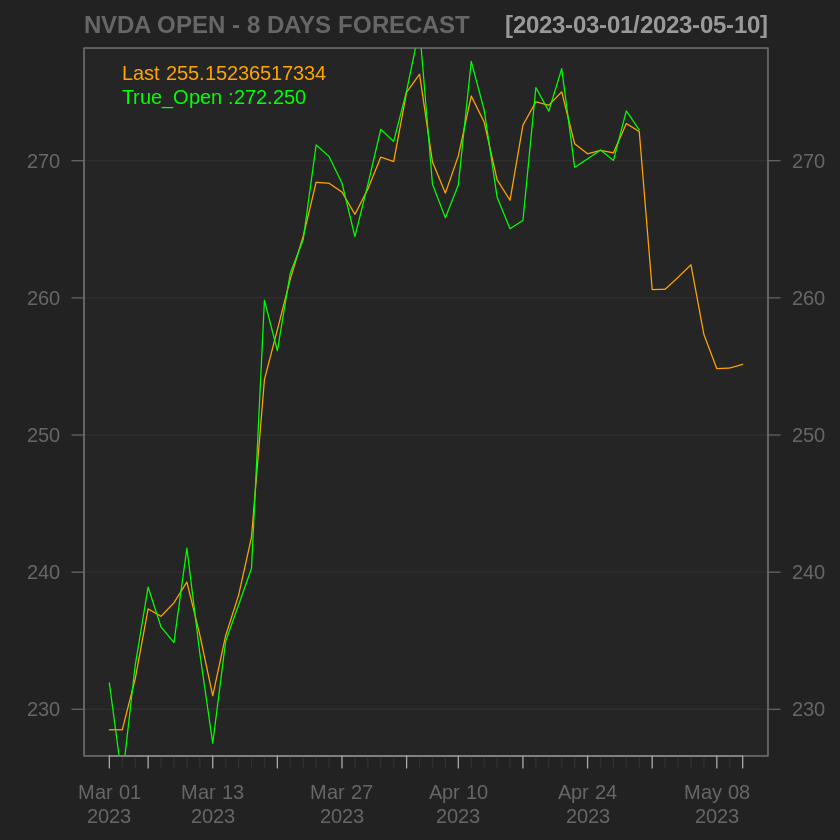

In [ ]:
# Open Prediction

Open_prediction <- predict(open_rf_model, stock_open)
Open_prediction <- as.data.frame(Open_prediction)
Open_prediction$Date <- stock_adj_close$Dup_Date
True_Open <- stock[,1]

# Creamos el gráfico

chartSeries(Open_prediction, 
            name = paste0(ticker, " ", op_title, " - ", days_range, " DAYS FORECAST"),
            theme = "black", 
            subset = '2023-03-01::2023-05-20',
            up.col = "orange")

addTA(True_Open, on = 1, col = "green")


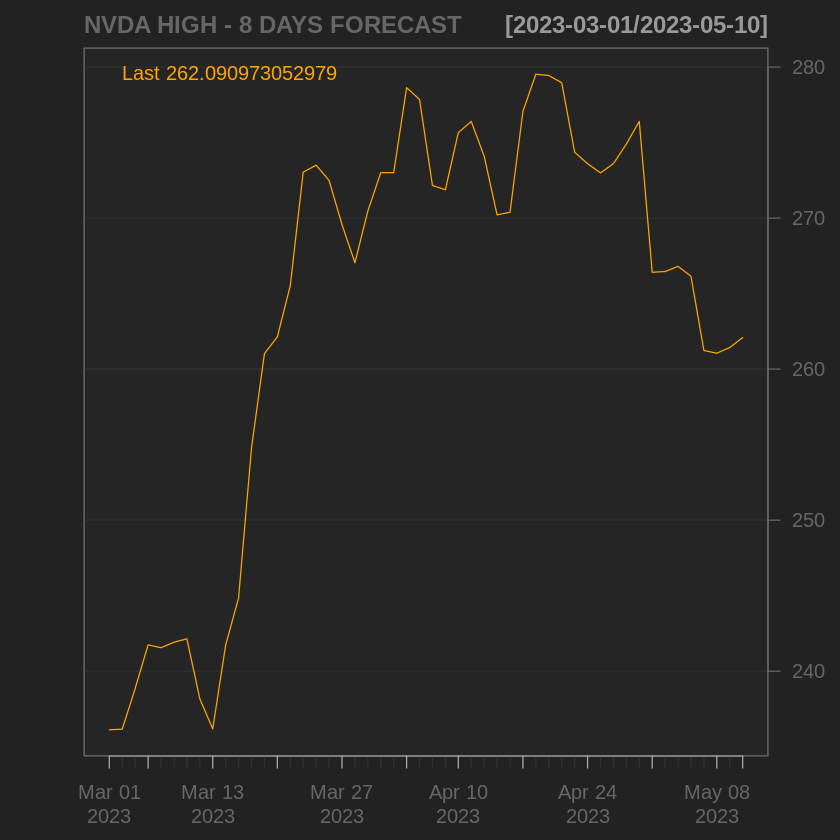

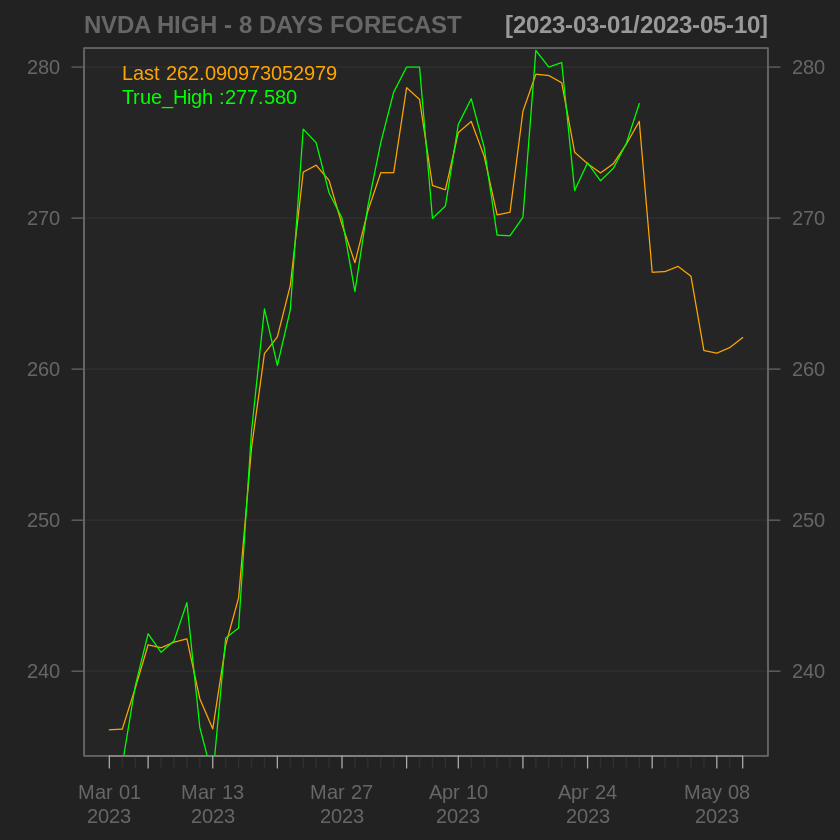

In [ ]:
# High Prediction

High_prediction <- predict(high_rf_model, stock_high)
High_prediction <- as.data.frame(High_prediction)
High_prediction$Date <- stock_adj_close$Dup_Date
True_High <- stock[,2]

# Creamos el gráfico

chartSeries(High_prediction, 
            name = paste0(ticker, " ", hg_title, " - ", days_range, " DAYS FORECAST"),
            theme = "black", 
            subset = '2023-03-01::2023-05-20',
            up.col = "orange")

addTA(True_High, on = 1, col = "green")


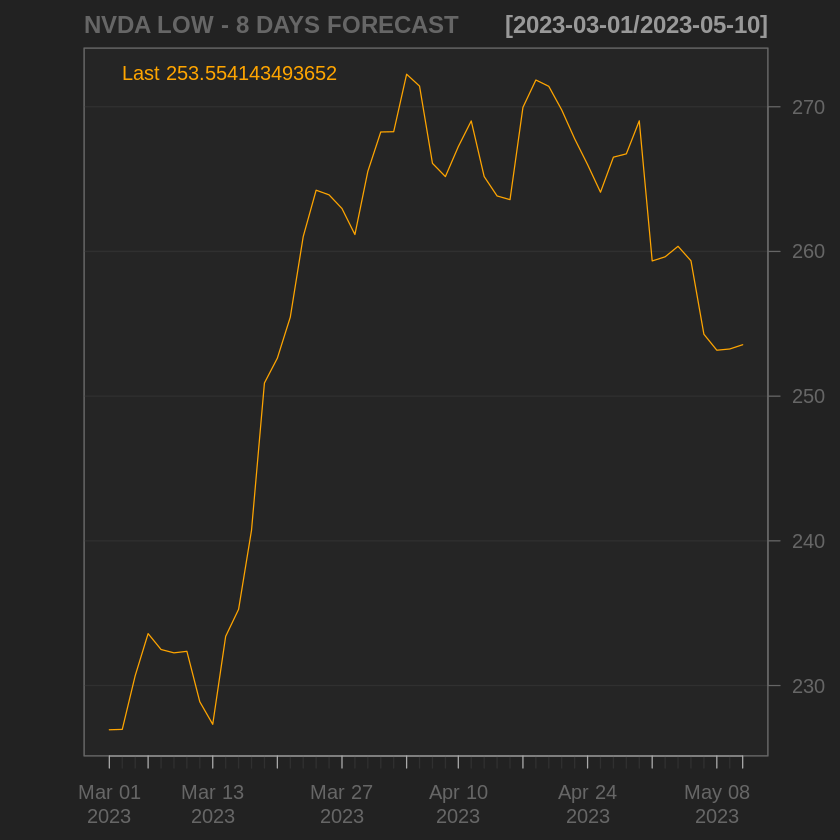

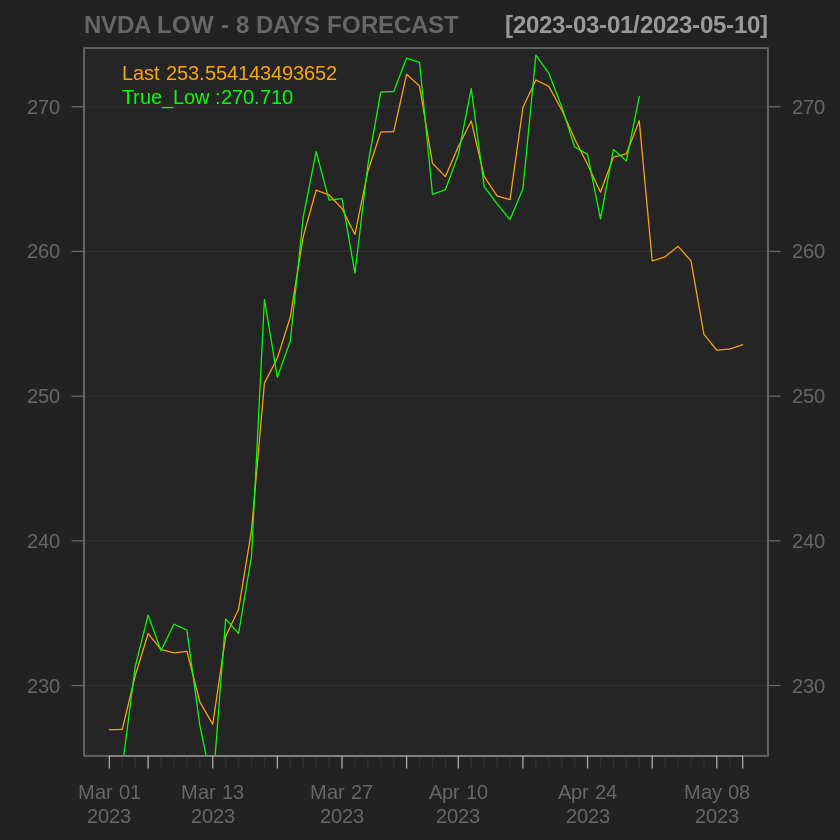

In [ ]:
# Low Prediction

Low_prediction <- predict(low_rf_model, stock_low)
Low_prediction <- as.data.frame(Low_prediction)
Low_prediction$Date <- stock_adj_close$Dup_Date
True_Low <- stock[,3]

# Creamos el gráfico

chartSeries(Low_prediction, 
            name = paste0(ticker, " ", lw_title, " - ", days_range, " DAYS FORECAST"),
            theme = "black", 
            subset = '2023-03-01::2023-05-20',
            up.col = "orange")

addTA(True_Low, on = 1, col = "green")


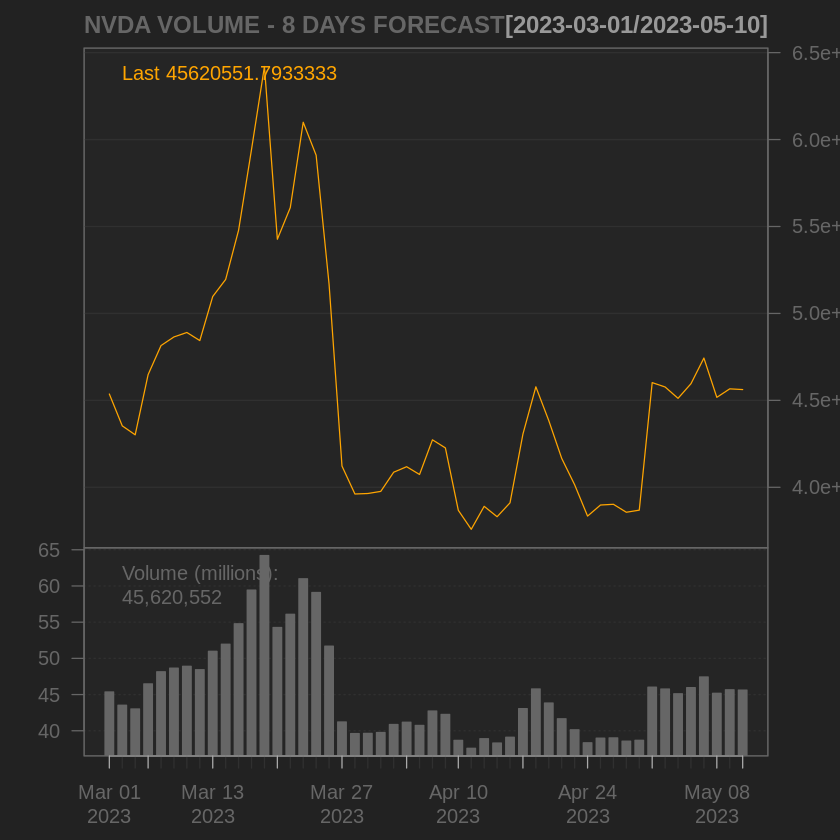

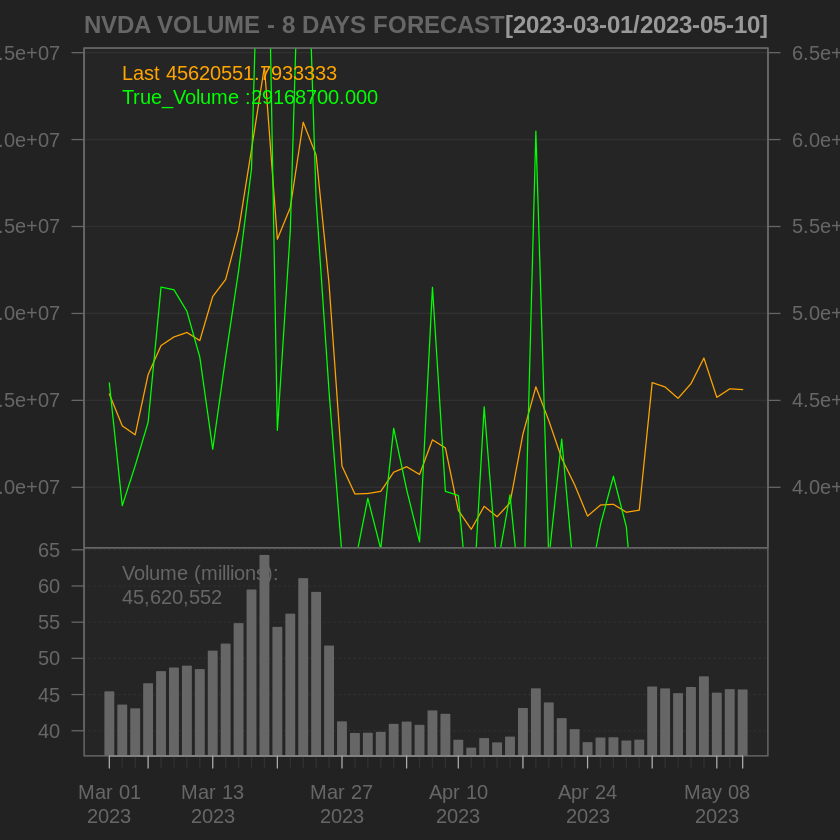

In [ ]:
# Volume Prediction

Volume_prediction <- predict(vol_rf_model, stock_volume)
Volume_prediction <- as.data.frame(Volume_prediction)
Volume_prediction$Date <- stock_adj_close$Dup_Date
True_Volume <- stock[,5]

# Creamos el gráfico

chartSeries(Volume_prediction, 
            name = paste0(ticker, " ", vl_title, " - ", days_range, " DAYS FORECAST"),
            theme = "black", 
            subset = '2023-03-01::2023-05-20',
            up.col = "orange")

addTA(True_Volume, on = 1, col = "green")


# Visualización de Adjusted Close Forecast

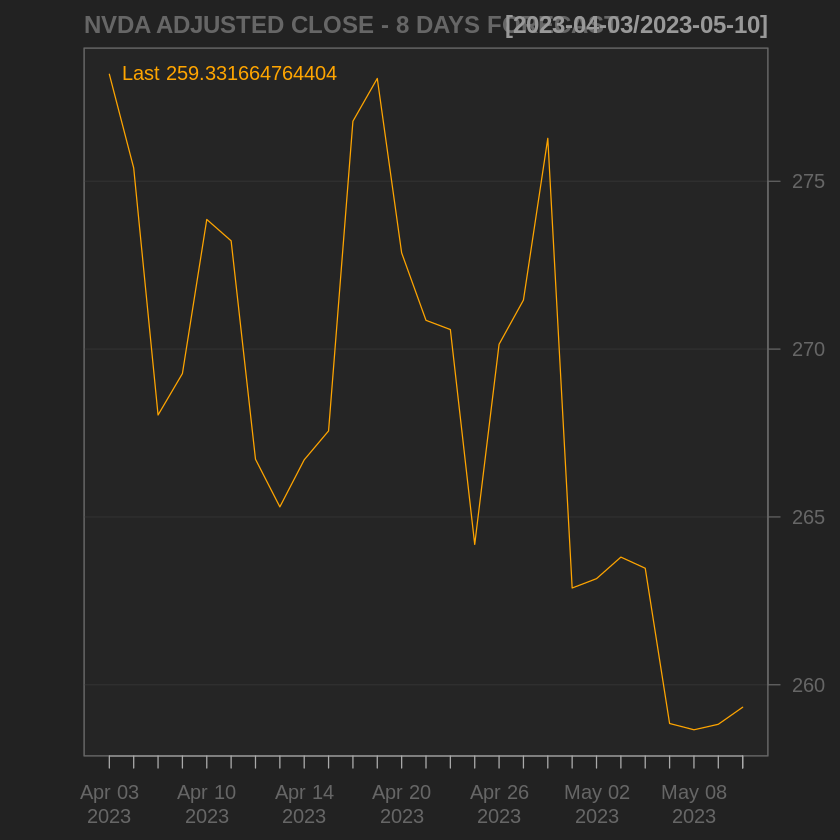

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“"subset" is not a graphical parameter”


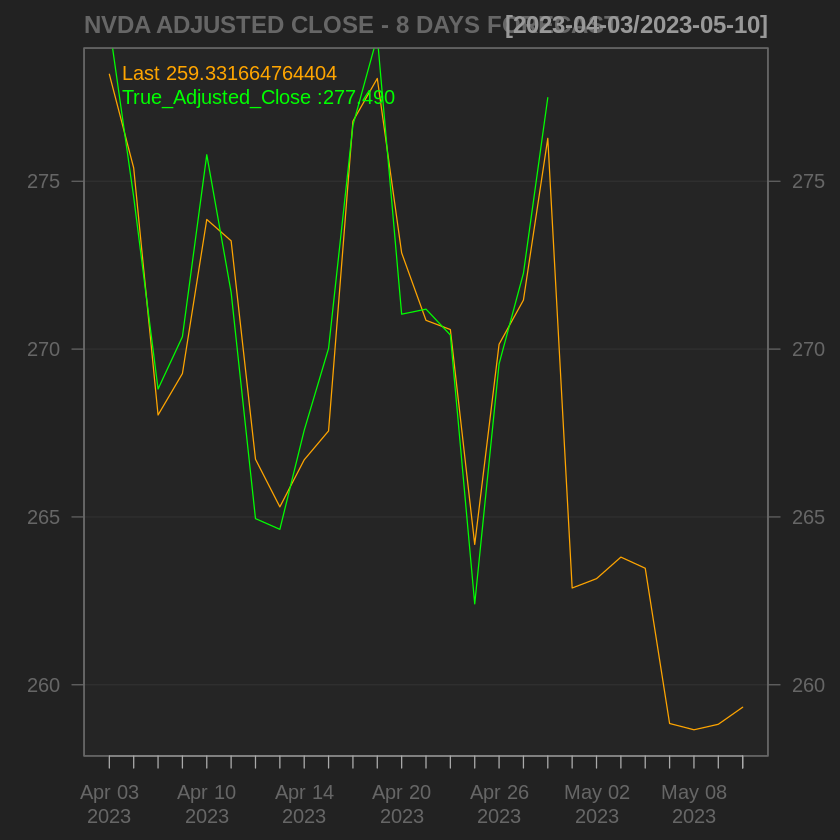

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“"subset" is not a graphical parameter”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“"subset" is not a graphical parameter”


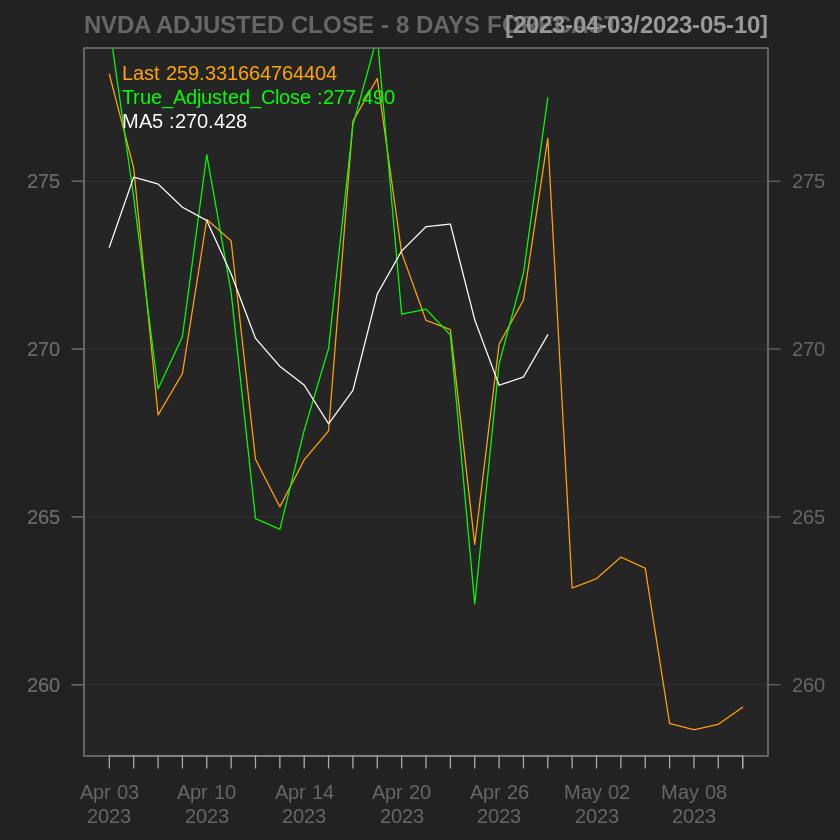

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“"subset" is not a graphical parameter”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“"subset" is not a graphical parameter”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“"subset" is not a graphical parameter”


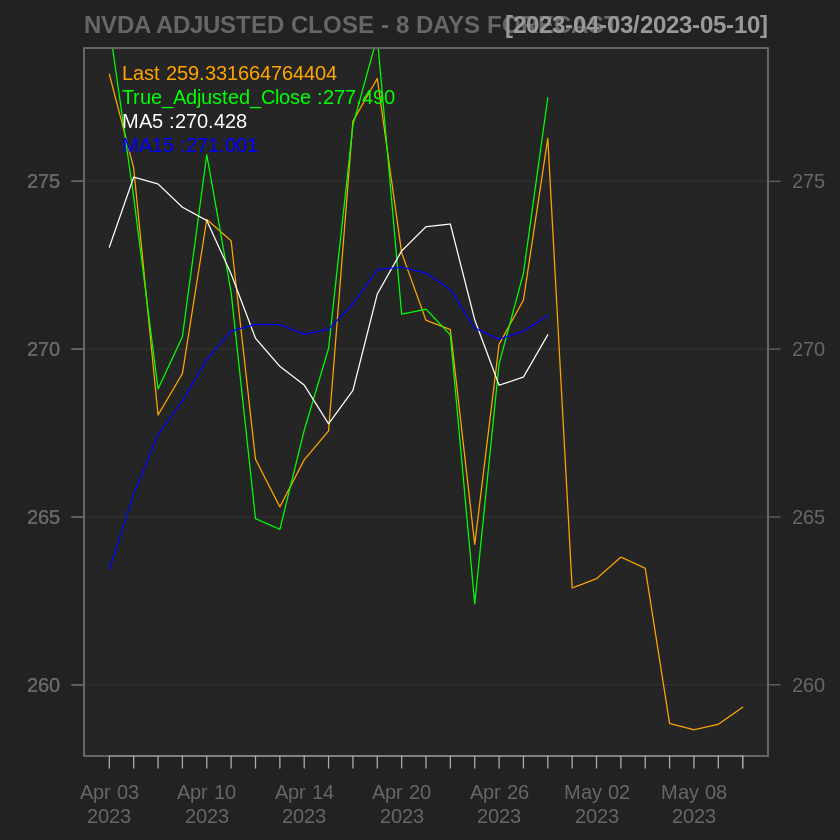

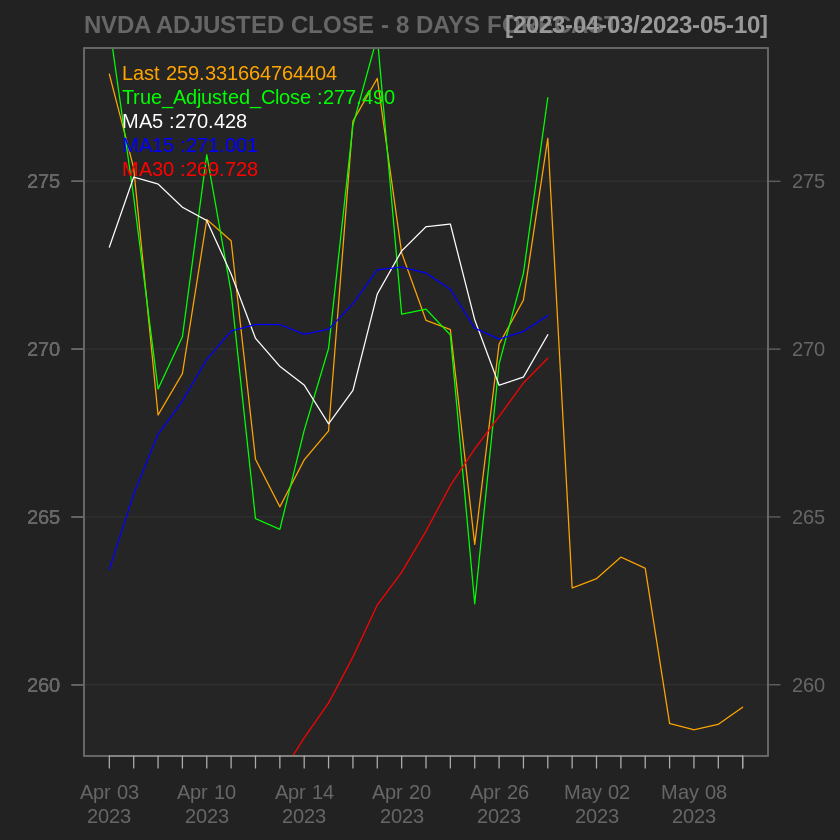

In [ ]:
# Adjusted Close Prediction

Adjusted_Close_prediction <- predict(adjcl_rf_model, stock_adj_close)
Adjusted_Close_prediction <- as.data.frame(Adjusted_Close_prediction)
Adjusted_Close_prediction$Date <- stock_adj_close$Dup_Date
True_Adjusted_Close <- stock[,6]

# Creamos el gráfico

chartSeries(Adjusted_Close_prediction, 
            name = paste0(ticker, " ", adcl_title, " - ", days_range, " DAYS FORECAST"),
            theme = "black", 
            subset = '2023-04-01::2023-05-20',
            up.col = "orange")

addTA(True_Adjusted_Close, on = 1, col = "green")

# Añadimos las Medias Móviles

addTA(MA5, on = 1, col = "white", subset = dates)
addTA(MA15, on = 1, col = "blue", subset = dates)
addTA(MA30, on = 1, col = "red", subset = dates)



# Comparamos el pronóstico contra el comportamiento real 

In [ ]:
# Actualizamos nuestros datos a la fecha de hoy

updt_stock <- getSymbols(ticker, src = "yahoo", from = "1900-01-01",
                    to = (today() + 1), periodicity = "daily", auto.assign = FALSE)


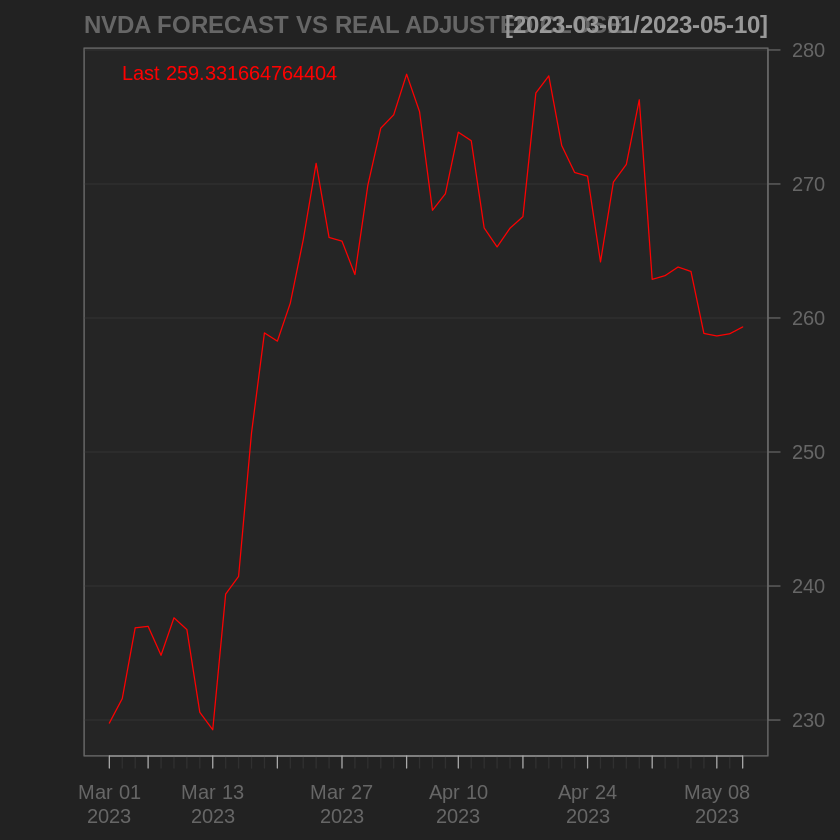

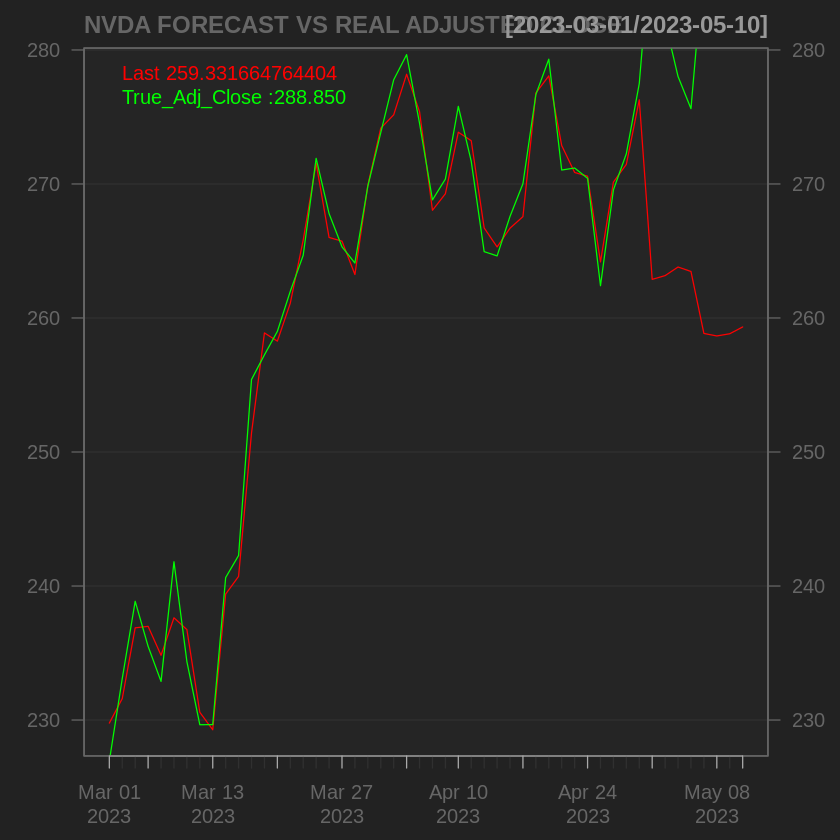

In [ ]:
# Visualizamos 

dates <- paste0("2023-03-01::", today() + 1)

True_Adj_Close <- updt_stock[,6]

chartSeries(Adjusted_Close_prediction, 
            name = paste0(ticker, " ", "FORECAST VS REAL ADJUSTED CLOSE"),
            theme = "black",
            subset = dates,
            up.col = "red")

addTA(True_Adj_Close, on = 1, col = "green")


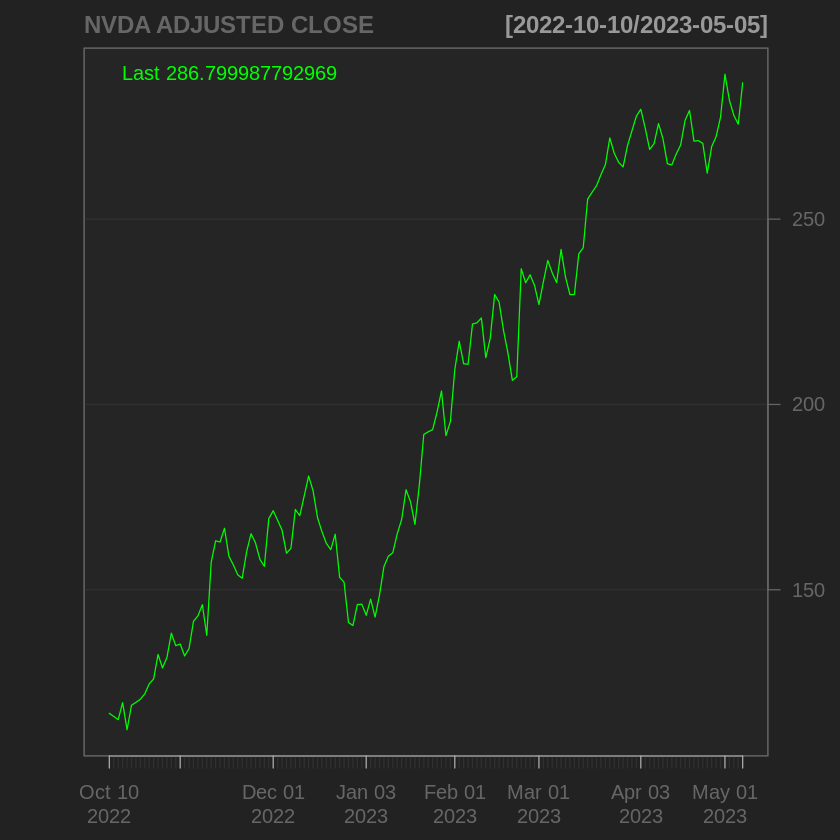

In [ ]:
chartSeries(updt_stock[,6], 
            name = paste0(ticker, " ", "ADJUSTED CLOSE"),
            theme = "black",
            subset = "2022-10-10::2023-05-05")